In [3]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt

In [22]:
N = 6805
X = pd.read_csv("C:/Users/Rstudio/Desktop/ESC/FinalProjectESC/final_knn.csv")
Y = X["class"]
Y = pd.DataFrame(Y)
Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
6800,0
6801,0
6802,0
6803,1


In [23]:
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train_sc.reset_index(drop=True, inplace=True)
X_test_sc.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=2)
Phi_train = poly.fit_transform(X_train_sc)
Phi_test = poly.fit_transform(X_test_sc)

In [26]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(Phi_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)

In [28]:
def Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Ridge?##
    #1. Call Ridge function as an object
    reg = Ridge()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
   
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [[ 0.000e+00 -1.387e-05 -1.591e-06  9.035e-06 -1.834e-05 -1.815e-06
   5.487e-06  8.289e-05 -6.377e-07 -2.025e-05  4.950e-06  6.409e-05
   6.444e-05  1.666e-05  2.127e-06 -1.712e-06  1.589e-06 -4.615e-05
   1.053e-06 -9.547e-06 -8.404e-06  1.092e-06 -2.584e-05  3.042e-05
  -2.522e-06 -3.635e-06  5.440e-06 -1.856e-06 -5.168e-06  1.365e-06
  -1.607e-05  1.415e-06  1.066e-06 -3.559e-06  1.290e-04  8.207e-06
  -2.851e-05 -1.572e-06  8.493e-06  4.998e-01 -2.942e-07 -2.435e-06
  -1.909e-07  2.572e-06 -6.323e-07  2.755e-07  2.235e-04 -1.907e-07
   2.023e-07 -5.914e-07  6.138e-06  9.835e-06 -4.233e-06 -2.660e-06
  -6.760e-06 -4.188e-07  2.599e-05  2.211e-06 -8.884e-06  1.019e-05
  -5.610e-06 -6.991e-06  3.224e-06  1.855e-06 -1.065e-07  4.922e-07
   7.133e-08 -5.857e-07  3.525e-08 -2.399e-06 -8.410e-06 -9.901e-07
  -3.591e-07 -3.463e-04  3.360e-07 -7.255e-05 -2.374e-07 -2.683e-07
  -2.289e-06  1.736e-06 -1.830e-07  1.479e-06  1.646e-06  1.364e-06
  -1.310e-04  1.797e-06  4.896e-07  2.56

C:\Users\Rstudio\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Rstudio\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


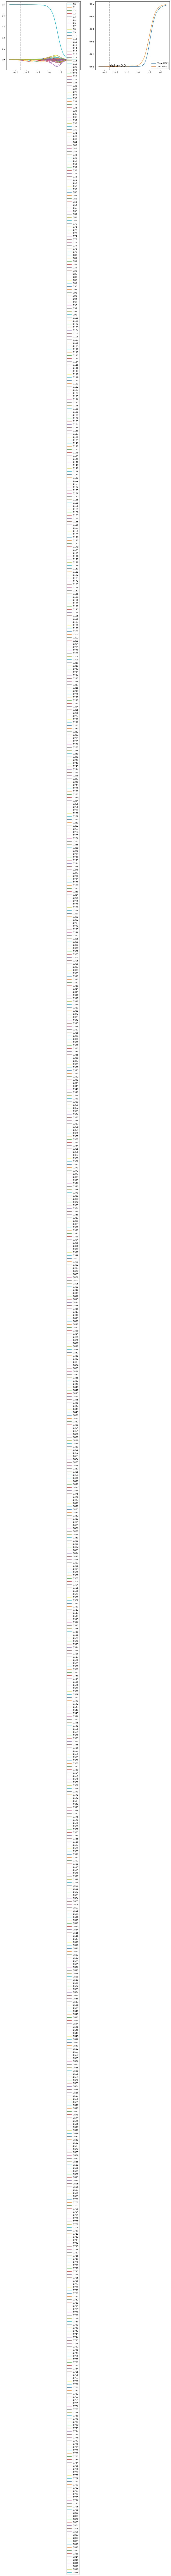

In [29]:
Ridge_output = Ridge_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)

In [30]:
def Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=False):
    
    ## How to Lasso?##
    #1. Call Lasso function as an object
    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(Phi_train, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(Phi_train)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(Phi_test)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = ['X%d'%i for i in range(Phi_train.shape[1])]
        for i in range(Phi_train.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

In [32]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

C:\Users\Rstudio\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02383513602406898, tolerance: 0.023687801805584708
  positive)
C:\Users\Rstudio\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024341578168480565, tolerance: 0.023687801805584708
  positive)
C:\Users\Rstudio\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024777379871569923, tolerance: 0.023687801805584708
  positive)
C:\Users\Rstudio\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

Weight: [ 0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00  0.000e+00
 -0.000e+00 -0.000e+00  0.000e+00 -0.000e+00 -0.000e+00  0.000e+00
  0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00 -0.000e+00  0.000e+00
 -0.000e+00 -0.000e+00  0.000e+00  0.000e+00 -0.000e+00  0.000e+00
 -0.000e+00 -0.000e+00 -0.000e+00  0.000e+00 -0.000e+00 -0.000e+00
 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00
 -0.000e+00 -0.000e+00  0.000e+00  9.999e-01 -2.746e-08  0.000e+00
  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00 -0.000e+00  0.000e+00
 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00 -0.000e+00  0.000e+00
 -0.000e+00 -0.000e+00 -0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00 -0.000e+00
 -0.000e+00 -0.000e+00  0.000e+00  0.000e+00 -0.000e+00  0.000e+00
 -0.000e+00 -0.000e+00  0.000e+00  0.000e+00  0.000e+00 -0.000e+00
 -0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
 -0.000e+00  0.000e+00  0.000e+00  0.000e+00 -0.000e+0

C:\Users\Rstudio\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Rstudio\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


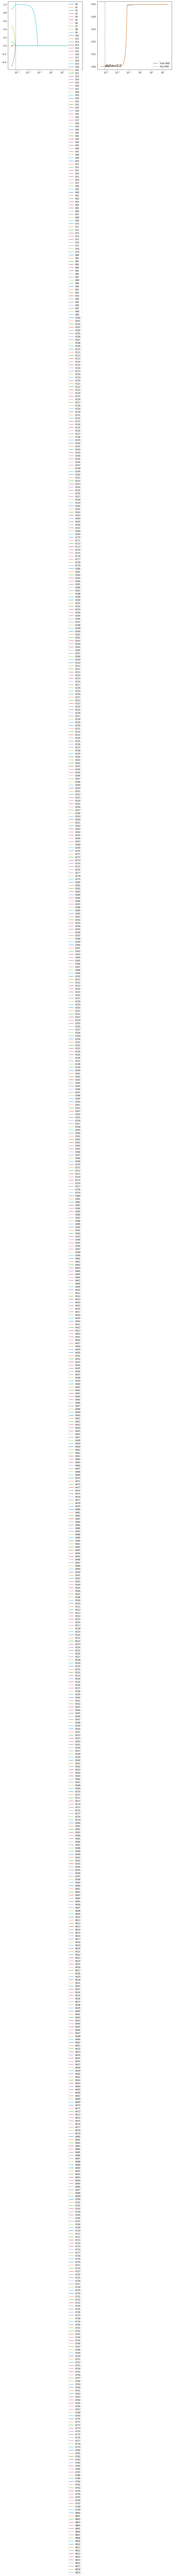

In [33]:
Lasso_output = Lasso_Reg(Phi_train, Y_train, Phi_test, Y_test, alphas, fig=True)